<b>This file contains some of the OpenCV techniques that I had researched for the project.</b>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir

%matplotlib inline

In [3]:
img = cv2.imread('/path/to/image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
img_original = img
plt.imshow(img)

# MSER and Canny Detectors

In [ ]:
##MSER
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

MinDiversity = 0.9
MaxVariation = 0.1
Delta = 10

vis = img.copy()
mser = cv2.MSER(_delta = Delta, _max_variation=MaxVariation, _min_diversity=MinDiversity)
# mser = cv2.MSER()
regions = mser.detect(img_gray, None)

In [ ]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
# cv2.polylines(img_gray, hulls, 1, (0, 255, 0))
# cv2.drawContours(vis, hulls, -1, (0,255,0), cv2.FILLED)
for region in regions:
    cv2.fillPoly(img_gray, pts =[region], color=(255,255,255))
# cv2.putText(vis, , (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0))
# img_gray[np.where(not(img_gray == [255,255,255]).all(axis = 2))] = [0,0,0]

imageWidth = img_gray.shape[1] #Get image width
imageHeight = img_gray.shape[0] #Get image height

xPos, yPos = 0, 0

while xPos < imageWidth: #Loop through rows
    while yPos < imageHeight: #Loop through collumns
        pixel = img_gray.item(yPos, xPos)
        if pixel != 255:
            img_gray.itemset((yPos, xPos), 0) #Set B to 255

        yPos = yPos + 1 #Increment Y position by 1

    yPos = 0
    xPos = xPos + 1 #Increment X position by 1

plt.imshow(img_gray, cmap='gray')

In [4]:
## Canny Detector
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')
# image_check = cv2.bitwise_and(img_gray, edges)
# plt.imshow(image_check, cmap='gray')

# Create Bounding Boxes

In [5]:
ret,thresh = cv2.threshold(edges,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
letters = []
minRect = []
# img = img_original

plt.figure(figsize=(40,20))
count = 0
for cnt in contours:
#     minRect.append(cv2.minAreaRect(cnt))
    area = cv2.contourArea(cnt)
    
    x,y,w,h = cv2.boundingRect(cnt)
    letters.append(img[y:y+h,x:x+w])    
    # check if it contains a letter, using classifier
    # CNN classifier
    # if yes, add boundingbox
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    cv2.rectangle(img,(x-2,y-2),(x+w+2,y+h+2),(0,255,0),1)
#       cv2.putText(img,str(area),(x,y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,255,155))
    count = count + 1
    cv2.imwrite('parts/' + str(count) + '.jpg', img[y-2:y+h+2, x-2:x+w+2])
plt.imshow(img)


# Create Rotated Bounding Boxes

In [ ]:
img = cv2.imread('/path/to/image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_original = img

## Canny Detector
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')

ret,thresh = cv2.threshold(edges,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
minRect = []
img = img_original

for cnt in contours:
    minRect.append(cv2.minAreaRect(cnt))

for rect in minRect:
    box = cv2.cv.BoxPoints(rect)
    box = np.int0(box)
    box_mean_by_column = np.mean(box, axis=0)
    # print box
    for i in range(box.shape[0]):
        for j in range(box.shape[1]):
            if j == 0:
                if box[i][j] <= box_mean_by_column[0]:
                    box[i][j] = box[i][j] - 2
                else:
                    box[i][j] = box[i][j] + 2
            else:
                if box[i][j] <= box_mean_by_column[1]:
                    box[i][j] = box[i][j] - 2
                else:
                    box[i][j] = box[i][j] + 2

    cv2.drawContours(img,[box],0,(0,255,0),1)

plt.figure(figsize=(40,20))
plt.imshow(img)

# Image Resizing

In [ ]:
## OpenCV image resizer - maintain aspect ratio

img_resize = cv2.imread("/path/to/image.jpg")
r = 100.0 / img_resize.shape[1]
dim = (100, int(img_resize.shape[0] * r))
 
# perform the actual resizing of the image and show it
resized = cv2.resize(img_resize, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('image1_resize.jpg', resized)

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import re

## create a method resize_maintain_aspect_ratio_no_pad_crop

base_name = 'Img'
subFolders = ['BadImag', 'GoodImg']
filename_count = 0

cwd = os.getcwd()
for folder in subFolders:
    directory = os.path.join(cwd, base_name, folder, 'Bmp')
    for x in os.walk(directory):
        path = x[0]
        files = [f for f in listdir(path) if re.match(r'.*\.png', f)]
        print 'processing directory - ' + path
        for filename in files:
            filepath = os.path.join(path, filename)
            img_resize = cv2.imread(filepath)
            img_resize = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)

            shape = img_resize.shape

            # we would want to keep the maximum, either length or width as 100. 
            # Avoid sizes like 100x123 and instead have 80*100.
            # and pad the smaller value in tensorflow so that we dont have to crop the image.

            r = 100.0 / img_resize.shape[0]
            if shape[1] < shape[0]:
                dim = (int(img_resize.shape[1] * r), 100)
            else:
                dim = (100, int(img_resize.shape[0] * r))

            resized = cv2.resize(img_resize, dim, interpolation = cv2.INTER_LINEAR)
            new_path = os.path.join(cwd, 'positive')
            
            shape = resized.shape
            length = shape[1] 
            width = shape[0]

            top = 0
            bottom = 0 
            left =0  
            right = 0

            if(length != 100):
                diff = 100 - length
                if diff%2 == 0:
                    left = diff/2
                    right = diff/2
                else:
                    left = diff/2
                    right = diff/2 + 1

            else:
                diff = 100 - width
                if diff%2 == 0:
                    top = diff/2
                    bottom = diff/2
                else:
                    top = diff/2
                    bottom = diff/2 + 1

#             print top, bottom, left, right
            final_img = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_REPLICATE)
            
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            new_name = os.path.join(new_path, '{0:04}'.format(filename_count) + '.png')
#             print '\t' + new_name
            filename_count = filename_count + 1
            cv2.imwrite(new_name, final_img)
        
print 'done...yay!'
        

# Image Features

(100, 100)


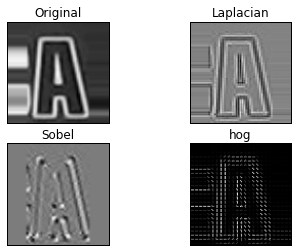

In [86]:
from skimage.feature import hog
from skimage import data, color, exposure
import re
from skimage import img_as_uint
# .

cwd = os.getcwd()
directory = os.path.join(cwd, 'positive')
files = [f for f in os.listdir(directory) if re.match(r'.*\.png', f)]
files = files[8090:8091]
for file_name in files:
#     print file_name
    file_path = os.path.join(directory, file_name)
    img = cv2.imread(file_path, 0)
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
#     canny = cv2.Canny(laplacian, 128, 255)
    sobel = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)

    fd, hog_image = hog(img, orientations=4, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualise=True)
#     hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
#     sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#     sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
#     print 'reaching here'
#     print hog_feats.shape
    new_name = os.path.join(os.path.join(directory, 'canny'), file_name)
#     print new_name
    if not os.path.exists(os.path.join(directory, 'canny')):
        os.makedirs(os.path.join(directory, 'canny'))
#     cv2.imwrite(new_name, laplacian)
    print hog_image.shape
    plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobel,cmap = 'gray')
    plt.title('Sobel'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(hog_image,cmap = 'gray')
    plt.title('hog'), plt.xticks([]), plt.yticks([])

    plt.show()
#     ----

(33, 26)


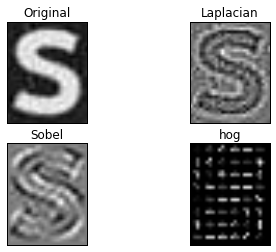

In [4]:
## Image Feature Extraction

from skimage.feature import hog
from skimage import data, color, exposure
import re
from skimage import img_as_uint

# img = cv2.imread('images/img011-00019.png', 0)
img = cv2.imread('/path/to/image.jpg', 0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobel = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)

fd, hog_image = hog(img, orientations=4, pixels_per_cell=(4, 4),
                cells_per_block=(2, 2), visualise=True)

print hog_image.shape
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(hog_image,cmap = 'gray')
plt.title('hog'), plt.xticks([]), plt.yticks([])

plt.show()